L'exercice est ici d'utiliser la méthode des KMeans avec Sklearn pour définir un nombre de catégories plus ou moins optimal sur lequel diviser notre dataset, puis d'afficher le résultat en utilisant une PCA réduisant le nombre de dimensions à 2 et permettant la visualisation des données.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
X = df.drop(['country'], axis = 1)

On ne garde que les variables numériques

In [5]:
X.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Pas de traitement des nulls a faire

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Standardisation

In [7]:
from sklearn.cluster import KMeans
distortionList = list()

for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(X_scaled)
    distortionList.append(kmeans.inertia_)

N'ayant pas de nombre de catégories prédéfinies à choisir, on utilise la méthode du coude ("Elbow method") pour arbitrairement choisir le nombre de centroids

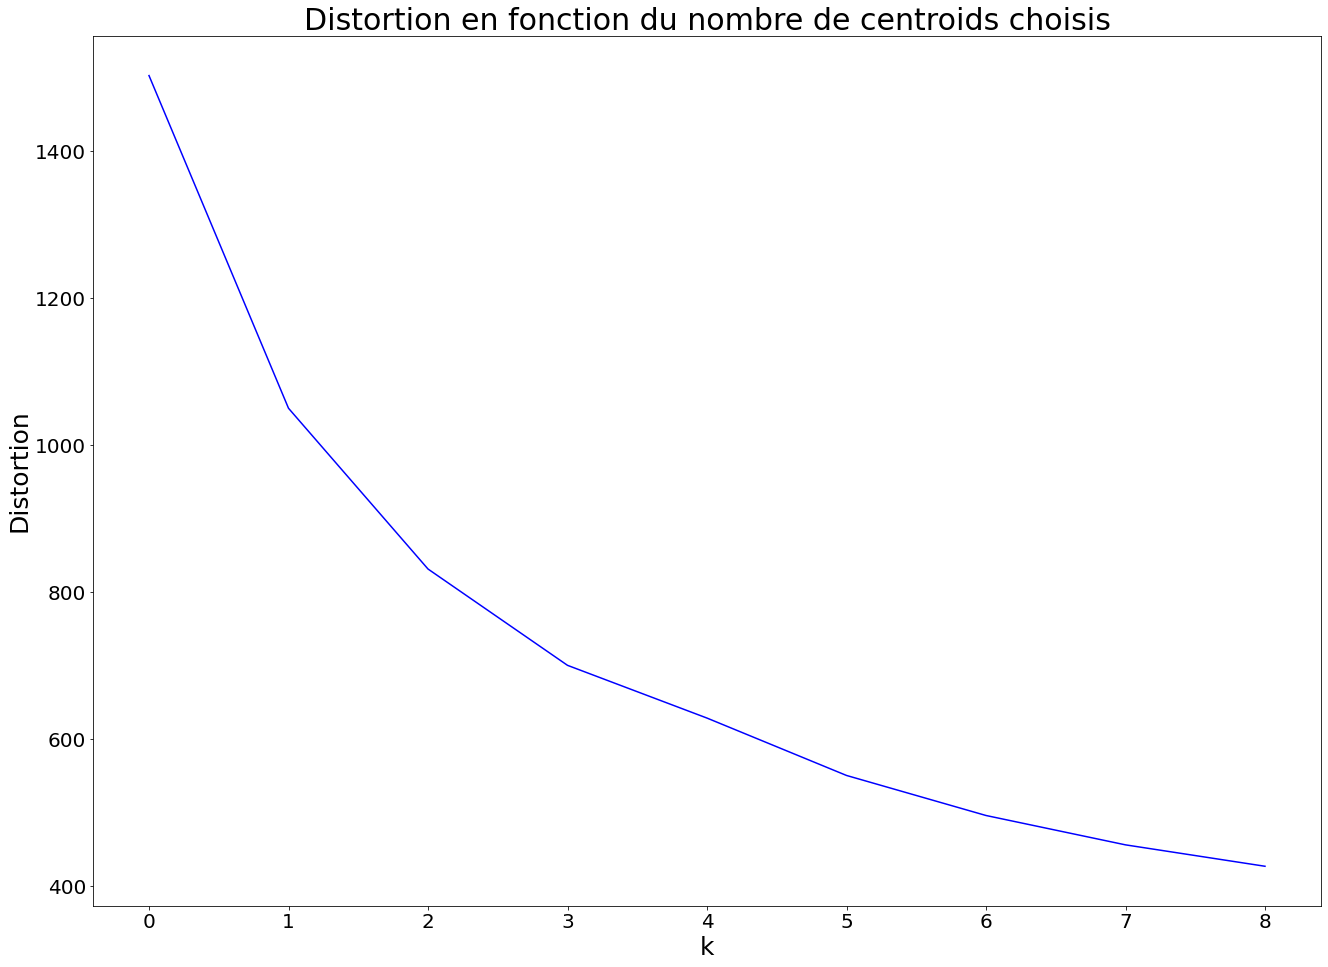

In [8]:
plt.figure(figsize = (22,16))
plt.plot(distortionList, c = 'blue', label = "")
plt.ylabel('Distortion', fontsize = 25)
plt.xlabel('k', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Distortion en fonction du nombre de centroids choisis', fontsize = 30)
plt.show()

On choisi k = 4 arbitrairement pour notre modèle au vu de la courbe de distortion

In [9]:
model = KMeans(n_clusters = 4).fit(X_scaled)

In [10]:
model.labels_

array([1, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3,
       3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3,
       2, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3,
       1, 3, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 3, 3, 0, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       2, 2, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3,
       1, 0, 3, 2, 3, 1, 2, 2, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1])

Appliquons maintenant une PCA pour afficher les résultats

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_scaled) #2 dimensions pour faire un graphique
print(pca.explained_variance_ratio_.sum())

0.6313336543771411


La PCA ne permet d'afficher que 63% des informations, c'est relativement faible mais nous nous en contenterons ici

In [12]:
new_df = pca.transform(X_scaled)

In [13]:
new_df = np.hstack((new_df, model.labels_.reshape(model.labels_.shape[0],1)))

In [14]:
new_df = pd.DataFrame(data = new_df,
                     index = np.arange(1,new_df.shape[0]+1),
                     columns = ['Principal component 1', 'Principal component 2', 'Categorie'])

In [15]:
new_df['Categorie'] = (new_df['Categorie']+1).astype('int')

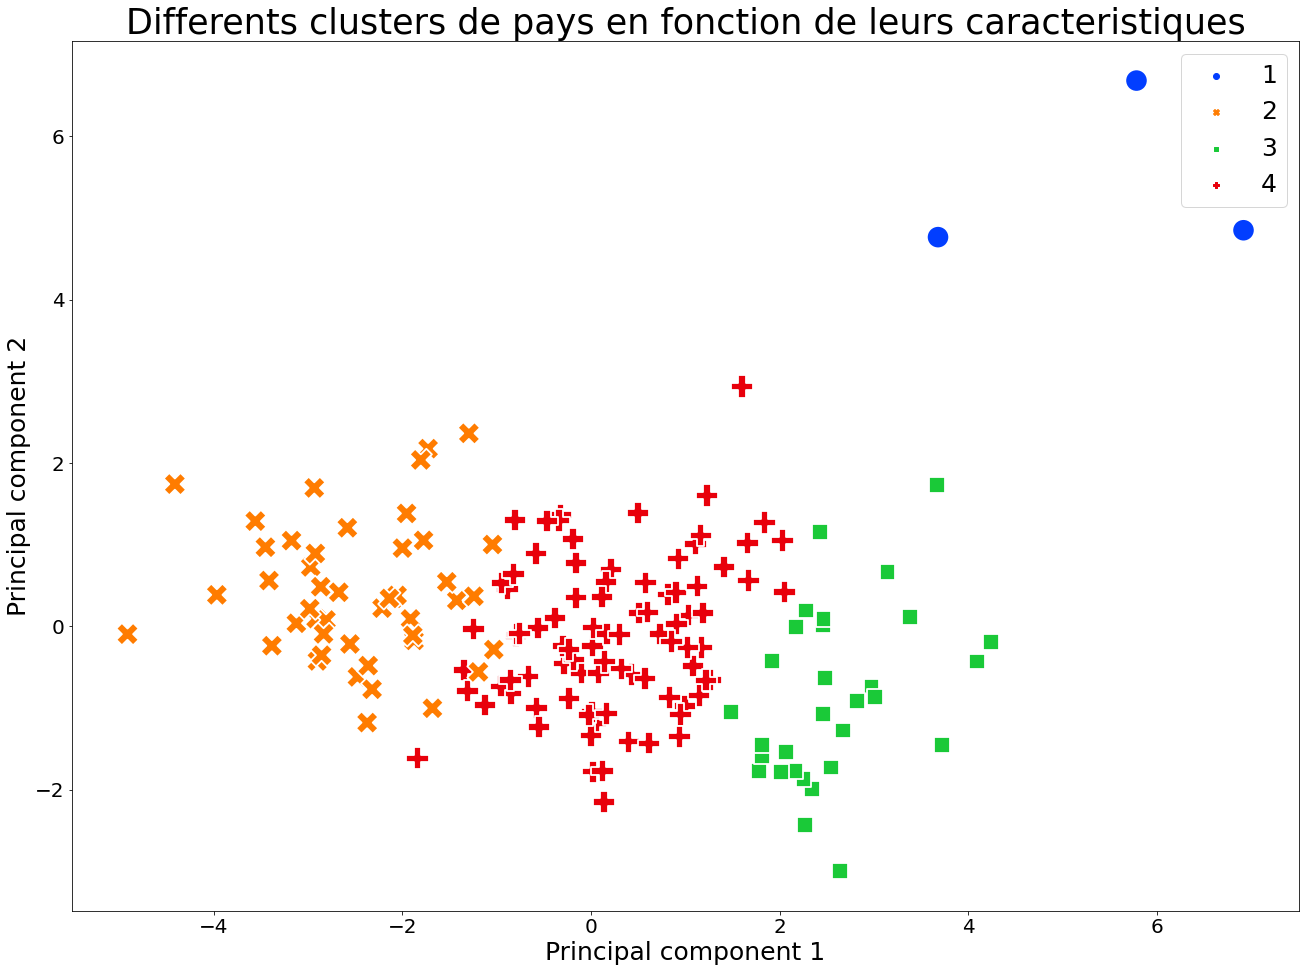

In [16]:
fig, axes = plt.subplots(figsize=(22, 16))
scatter = sns.scatterplot( data=new_df, x='Principal component 1', y='Principal component 2',
                hue = "Categorie", style = "Categorie", palette="bright", s = 500)

scatter.axes.set_title("Differents clusters de pays en fonction de leurs caracteristiques",fontsize=35)
scatter.set_xlabel("Principal component 1",fontsize=25)
scatter.set_ylabel("Principal component 2",fontsize=25)
scatter.tick_params(labelsize=20)
plt.legend(fontsize=25)
plt.show()

La catégorie 1 ne semble pas être très utile car on observe seulement trois points dessus. Toutefois ces 3 points semblent éloignés des autres (bien qu'on ne dispose que de 63% de la variance expliquée), ce sont sans doute des outliers qu'il faudrait alors supprimer pour pouvoir réduire le nombre de catégories à 3 et optimiser le modèle.